In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency  # For categorical data comparison (replace ANOVA if needed)
import joblib

In [2]:
# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Explore data using pandas and seaborn functions
train_data.head()  # View the first few rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Check for missing values
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
# Check for duplicates
train_data.duplicated().sum()

0

In [6]:
# Analyze data distribution (numerical features)
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Visualize data distribution (histograms, boxplots)

<Axes: >

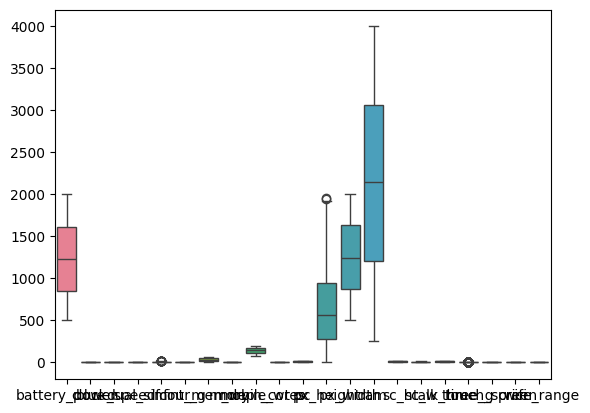

In [7]:
sns.boxplot(train_data)

<Axes: ylabel='Count'>

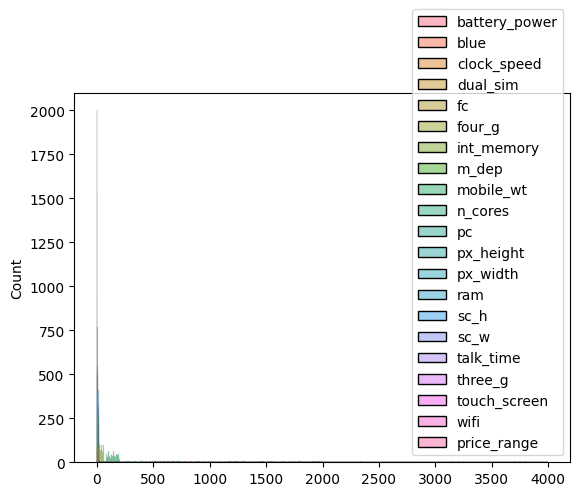

In [8]:
sns.histplot(train_data)

In [9]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Identify categorical and continuous variables

In [15]:
categorical_vars = train_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_vars = train_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: []
Continuous Variables: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [18]:

continuous_vars = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
Q1 = train_data[continuous_vars].quantile(0.25)
Q3 = train_data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((train_data[continuous_vars] < (Q1 - 1.5 * IQR)) | (train_data[continuous_vars] > (Q3 + 1.5 * IQR))).any(axis=1)
train_data[continuous_vars] = train_data[continuous_vars].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

<Axes: >

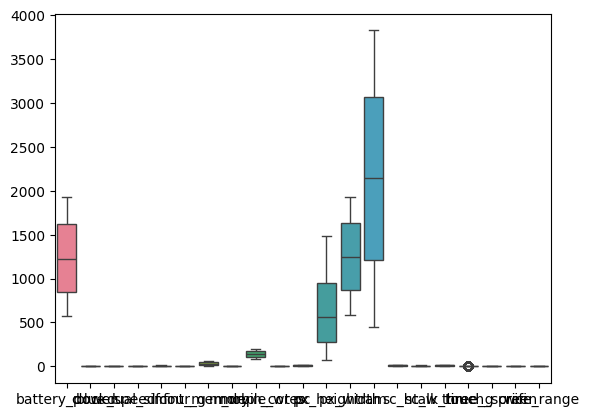

In [19]:
sns.boxplot(train_data)

In [20]:
# Analyze data types
train_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#Analyze relationships between features (correlation matrix or heatmap)

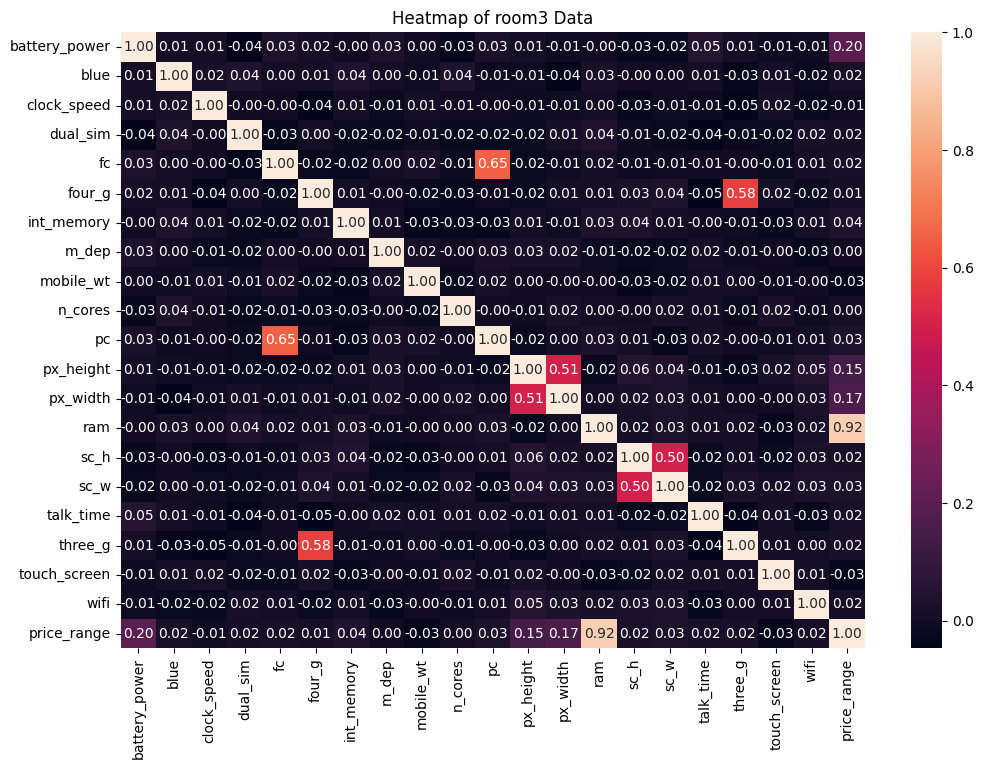

In [21]:
correlation = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Heatmap of room3 Data')
plt.show()

In [22]:
# Analyze relationships between specific features (ANOVA or chi-square tests)
# Assuming you have three or more columns to compare: 'group1', 'group2', 'group3'
f_stat, p_value = chi2_contingency(pd.crosstab(train_data['price_range'], train_data['ram']))  # Example for categorical data
print(f"Chi-Square statistic: {f_stat}, p-value: {p_value}")

ValueError: too many values to unpack (expected 2)

In [ ]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# ----- Exploratory Data Analysis (EDA) -----
# Separate features and target variable from training data
X_train = train_data.drop(columns=['price_range'])
y_train = train_data['price_range']

# Remove 'id' column from test data (if applicable)
X_test = test_data.drop(columns=['id'], errors='ignore')  # Ignore if 'id' doesn't exist

# Explore data using pandas and seaborn functions (similar to your existing code)
# ... your EDA code here ...

# ----- Model Building -----

# Normalize/Standardize the data (if necessary for your model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the training data into training and validation sets
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Develop a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_part, y_train_part)



In [ ]:
# Validate the model

y_pred_val = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {validation_accuracy}')

# Save the model for future use (optional)
joblib.dump(model, 'room3_model.pkl')  # Replace with appropriate filename